In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('recent-grads.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
pd.set_option("display.max.columns", None)

In [5]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


The `%matplotlib` magic command sets up your Jupyter Notebook for displaying plots with Matplotlib.

The standard Matplotlib graphics backend is used **by default**, and your plots will be displayed in a separate window.

The `inline` backend displays the plot in the notebook itself, immediately below the cell that creates the plot.

In [6]:
%matplotlib inline

`.plot()` creates line graphs **by default**.

The parameter `kind` can be used to determine what kind of charts/graphs will be created.

- "area" is for area plots.
- "bar" is for vertical bar charts.
- "barh" is for horizontal bar charts.
- "box" is for box plots.
- "hexbin" is for hexbin plots.
- "hist" is for histograms.
- "kde" is for kernel density estimate charts.
- "density" is an alias for "kde".
- "line" is for line graphs.
- "pie" is for pie charts.
- "scatter" is for scatter plots.

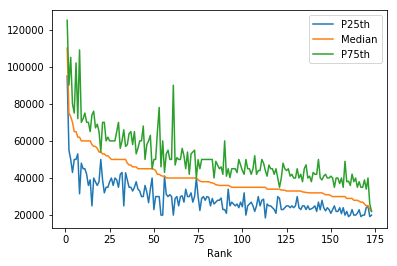

In [7]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

If you aren’t following along in a Jupyter Notebook or in an IPython shell, then you’ll need to use the pyplot interface from matplotlib to display the plot.

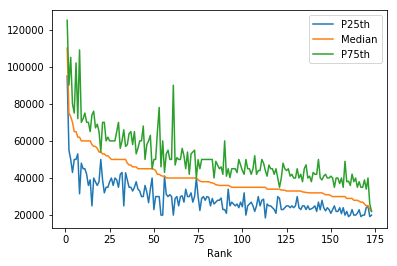

In [8]:
# Here’s how to show the figure in a standard Python shell.
import matplotlib.pyplot as plt
df.plot(x="Rank", y=["P25th", "Median", "P75th"])
# the figure will be displayed in a separate window by default
plt.show()

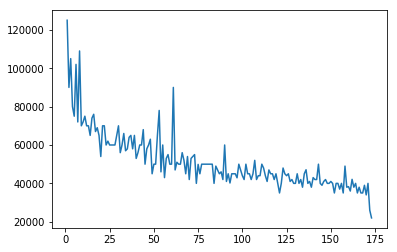

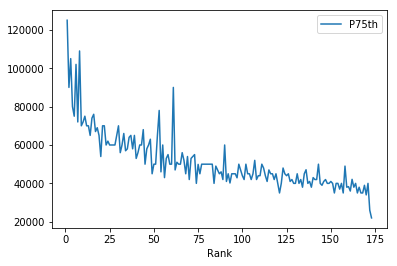

In [9]:
import matplotlib.pyplot as plt
plt.plot(df["Rank"], df["P75th"])
# or
# .plot() is a wrapper for pyplot.plot()  (prefer this way)
df.plot(x="Rank", y="P75th")

A histogram is a good way to visualize how values are distributed across a dataset. Sometimes, it can also help you to detect outliers.

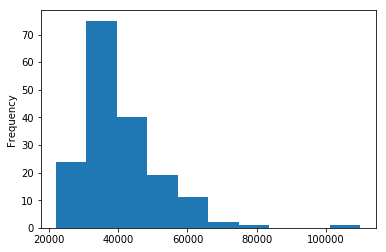

In [10]:
median_column = df["Median"]
median_column.plot(kind="hist")

(The histogram of the median data, peaks on the left below $40,000. The tail stretches far to the right and suggests that there are indeed fields whose majors can expect significantly higher earnings.)

In [11]:
# select the five majors with the highest median earnings
top_5 = df.sort_values(by="Median", ascending=False).head()

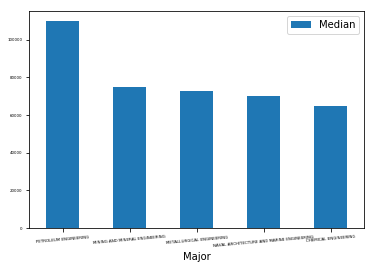

In [12]:
# use "rot" and "fontsize" parameters to rotate and size the labels of the x-axis
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4, color="tab:blue")

(This plot shows that the median salary of petroleum engineering majors is more than $20,000 higher than the rest. The earnings for the second- through fourth-place majors are relatively close to one another.)

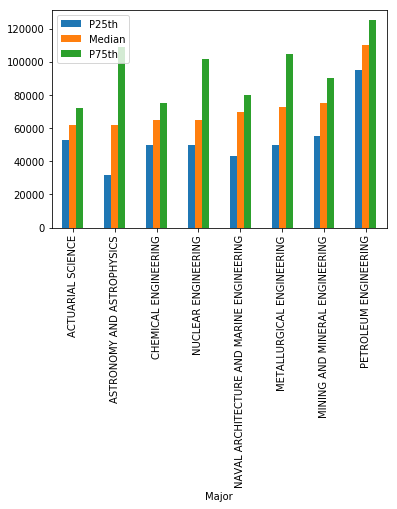

In [13]:
# select all majors whose median salary is above $60,000
top_medians = df[df["Median"] > 60000].sort_values("Median") 
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

(The 25th and 75th percentile confirm what you’ve seen above: petroleum engineering majors were by far the best paid recent graduates.)

## Check for Correlation

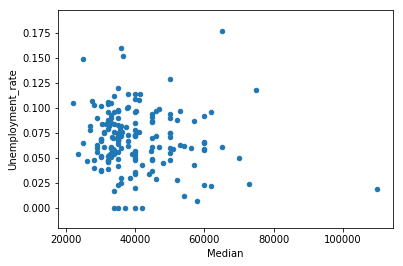

In [14]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

(A quick glance at this figure shows that there’s no significant correlation between the earnings and unemployment rate.)

While a scatter plot is an excellent tool for getting a first impression about possible correlation, it certainly isn ot definitive proof of a connection.

Even if a correlation exists between two values, it still does not mean that a change in one would result in a change in the other. In other words, **correlation does not imply causation**.

## Analyze Categorical Data

### Grouping

In [16]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

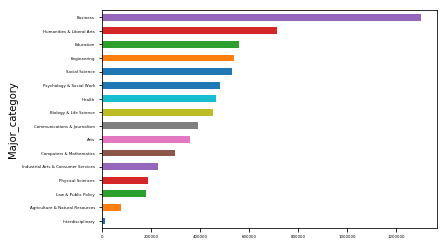

In [18]:
cat_totals.plot(kind="barh", fontsize=4)

(As your plot shows, business is by far the most popular major category. While humanities and liberal arts is the clear second, the rest of the fields are more similar in popularity.)

Vertical and horizontal bar charts are often a good choice if you want to see the difference between your categories. If you’re interested in ratios, then pie plots are an excellent tool.

### Ratios

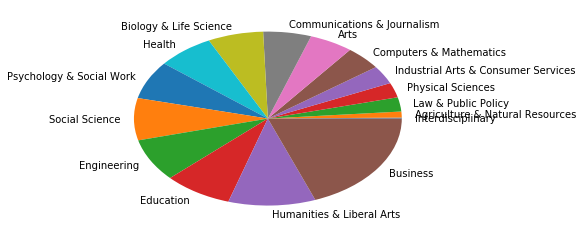

In [26]:
cat_totals.plot(kind="pie", label="")

Since `cat_totals` contains a few smaller categories, creating a pie plot with `cat_totals.plot(kind="pie")` will produce several tiny slices with overlapping labels. To address this problem, you can lump the smaller categories into a single group. Merge all categories with a total under 100,000 into a category called "Other", then create a pie plot.

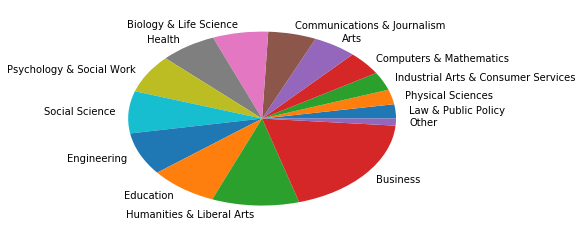

In [27]:
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]

# add a new item "Other" with the sum of the small categories
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="")

(The "Other" category makes up only a very small slice of the pie.)

### Zooming in on Categories

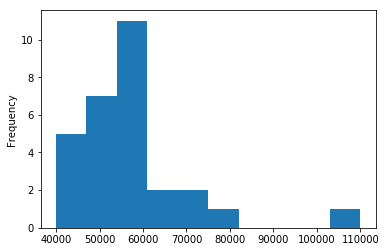

In [28]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")

(Compared to the histogram of all majors from the beginning, the range of the major median earnings is somewhat smaller, starting at $40,000. The distribution is closer to normal, although its peak is still on the left.)